# Module 5 Challenge

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import pearsonr, linregress

# Study data files
mouse_metadata_path = "Starter_Code/Pymaceuticals/data/Mouse_metadata.csv"
study_results_path = "Starter_Code/Pymaceuticals/data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
complete_mice_data = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")
#complete_mice_data = complete_mice_data.drop_duplicates(subset=['Mouse ID'])
#clean_mice_data.head()

# Display the data table for preview
complete_mice_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice
mice_count = len(complete_mice_data['Mouse ID'].unique())
mice_count


249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

# Identify duplicates based on array content and dtype in all columns
duplicate_mice_data = complete_mice_data[complete_mice_data.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]

# Display the DataFrame with array and dtype duplicates in all columns
duplicate_mice_data


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#clean_mice_data = complete_mice_data.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep=False)
#clean_mice_data.head()
duplicate_mice = complete_mice_data.duplicated(subset=['Mouse ID', 'Timepoint'])
duplicate_mice
complete_mice_data.loc[complete_mice_data['Mouse ID'] == "g989"]
complete_mice_data = complete_mice_data.drop(complete_mice_data[complete_mice_data['Mouse ID'] == 'g989'].index)


In [6]:
complete_mice_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [7]:
# Checking the number of mice in the clean DataFrame.
mice_count = len(complete_mice_data['Mouse ID'].unique())
mice_count


248

# Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean_tumor_volume = complete_mice_data.groupby("Drug Regimen")["Tumor Volume (mm3)"]
mean_tumor_volume 


In [9]:
summarized_mice_data = pd.DataFrame({
  
    'Mean Tumor Volume': complete_mice_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean(),
    'Median Tumor Volume': complete_mice_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median(),
    'Tumor Volume Variance': complete_mice_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var(),
    'Tumor Volume Std. Dev.': complete_mice_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std(),
    'Tumor Volume Std. Err.': complete_mice_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem(),
   
})

# Display the DataFrame
summarized_mice_data



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summarized_mice_data = (
    complete_mice_data.groupby("Drug Regimen")["Tumor Volume (mm3)"]
    .agg(['mean', 'median', 'var', 'std', 'sem'])
    .rename(columns={'mean': 'Mean Tumor Volume', 'median': 'Median Tumor Volume',
                     'var': 'Tumor Volume Variance', 'std': 'Tumor Volume Std. Dev.',
                     'sem': 'Tumor Volume Std. Err.'})
)
summarized_mice_data

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


# Bar and Pie Charts

<Axes: title={'center': 'Timepoints per Drug Regimen'}, xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

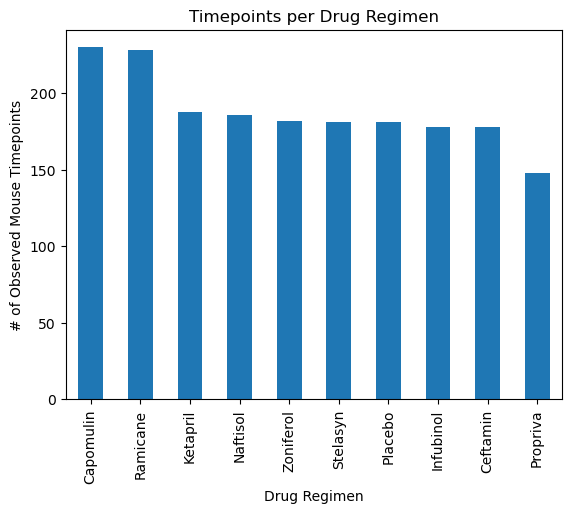

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
import pandas as pd

# Assuming 'complete_mice_data' is your DataFrame with columns 'Mouse ID', 'Timepoint', and 'Drug Regimen'
# And 'duplicate_mice_data' is a DataFrame with duplicate Mouse ID/Timepoint entries

# Remove duplicate rows from complete_mice_data
complete_mice_data = complete_mice_data.drop_duplicates(subset=["Mouse ID", "Timepoint"])

# Count the number of rows for each drug regimen
regimen_counts = complete_mice_data['Drug Regimen'].value_counts()

# Plot the counts using Pandas' plotting capabilities
regimen_counts.plot(kind='bar', xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints', title = 'Timepoints per Drug Regimen')


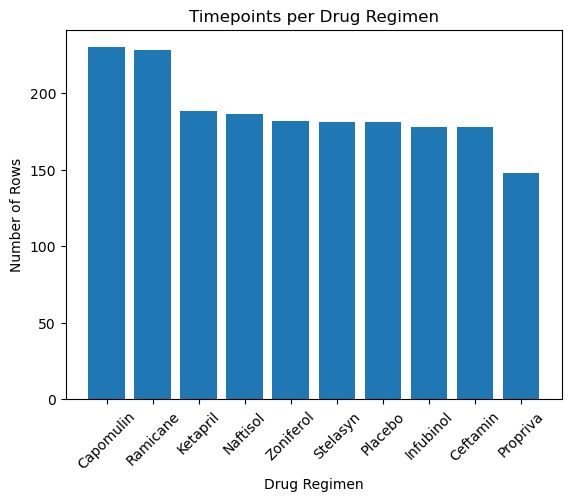

In [12]:
import matplotlib.pyplot as plt

# Assuming 'complete_mice_data' is your DataFrame with columns 'Mouse ID', 'Timepoint', and 'Drug Regimen'
# And 'duplicate_mice_data' is a DataFrame with duplicate Mouse ID/Timepoint entries

# Remove duplicate rows from complete_mice_data
complete_mice_data = complete_mice_data.drop_duplicates(subset=["Mouse ID", "Timepoint"])

# Count the number of rows for each drug regimen
regimen_counts = complete_mice_data['Drug Regimen'].value_counts()

# Get the drug regimens and their corresponding counts
regimens = regimen_counts.index
counts = regimen_counts.values

# Plot the counts using Pyplot
plt.bar(regimens, counts)

# Adding labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')
plt.title('Timepoints per Drug Regimen')

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=45)

# Show the plot
plt.show()


<Axes: ylabel='Sex'>

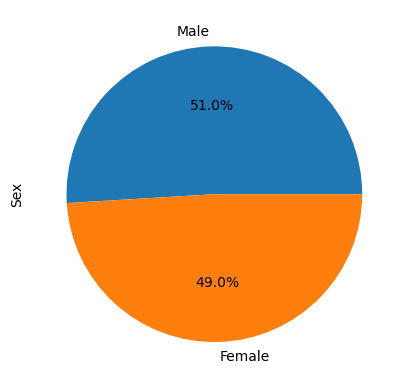

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_counts = complete_mice_data['Sex'].value_counts()
sex_counts.plot(kind='pie', autopct='%1.1f%%', ylabel = 'Sex')



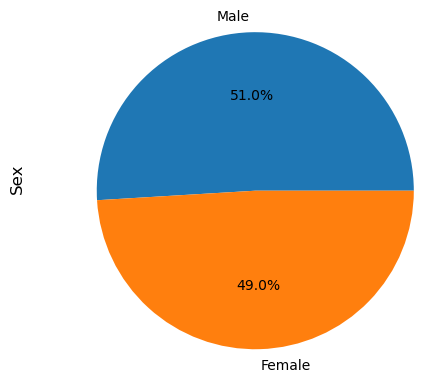

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'complete_mice_data' is your DataFrame with a column 'Sex' indicating the sex of mice

# Calculate the sex counts
sex_counts = complete_mice_data['Sex'].value_counts()

# Create a pie chart
plt.figure(figsize=(4.5, 4.5))
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%')

# Add label for the sex
plt.text(-1.5, 0, 'Sex', fontsize=12, color='black', rotation=90, ha='center')

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Show the plot
plt.show()



# Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = complete_mice_data.groupby('Mouse ID')['Timepoint'].max()
last_timepoint = last_timepoint.reset_index()
last_timepoint

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_timepoint = pd.merge(last_timepoint, complete_mice_data)
final_timepoint

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [16]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with potential outliers
potential_outliers = []

# Iterate through each treatment
for treatment in treatments:
    # Filter the dataset for the current treatment
    treatment_data = final_timepoint[final_timepoint['Drug Regimen'] == treatment]['Tumor Volume (mm3)']

    # Calculate quartiles
    Q1 = treatment_data.quantile(0.25)
    Q3 = treatment_data.quantile(0.75)
  #  Q1 = np.percentile(treatment_data, 25)
  #  Q3 = np.percentile(treatment_data, 75)
    
    # Calculate IQR
    IQR = Q3 - Q1
    
    # Determine outliers using upper and lower bounds
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    
    # Identify potential outliers for the current treatment
    outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]
    
    # Add outliers to the potential_outlier list
    potential_outliers.append(treatment_data)

# Print potential outliers
    print("Potential outliers for", treatment, ":", outliers)


Potential outliers for Capomulin : Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers for Ramicane : Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers for Infubinol : 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Potential outliers for Ceftamin : Series([], Name: Tumor Volume (mm3), dtype: float64)


Text(0, 0.5, 'Final Tumor Volume(mm3)')

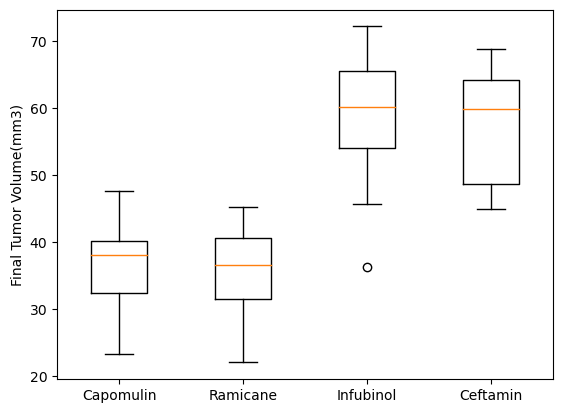

In [18]:
plt.boxplot(potential_outliers, labels = treatments)
plt.ylabel("Final Tumor Volume(mm3)")

# Line and Scatter Plots

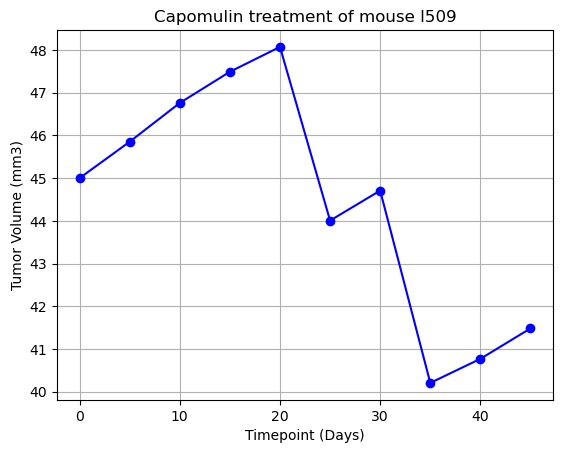

In [19]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

capomulin_data = complete_mice_data[complete_mice_data['Drug Regimen'] == 'Capomulin']

# Choose a single mouse ID
mouse_id = 'l509'

# Filter data for the chosen mouse
mouse_data = capomulin_data[capomulin_data['Mouse ID'] == mouse_id]

# Create the line plot
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], marker='o', color='b', linestyle='-')

# Add labels and title
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Capomulin treatment of mouse {mouse_id}')

# Display the plot
plt.grid(True)
plt.show()


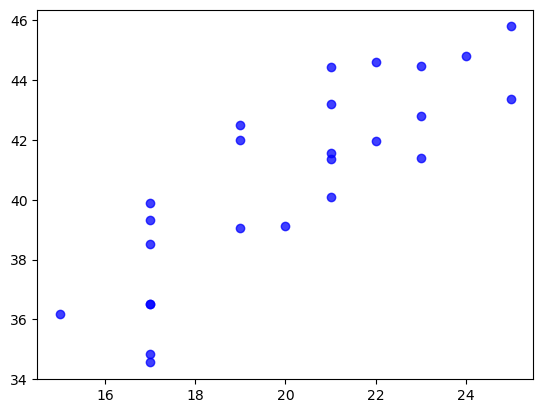

In [20]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
avg_tumor_cap = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].unique()
# Create a DataFrame with mouse weight and average tumor volume
mouse_df = pd.DataFrame({
    'Mouse Weight (g)': mouse_weight,
    'Average Tumor Volume (mm3)': avg_tumor_cap
})
#Clean up data (take out the bars)
mouse_df['Mouse Weight (g)'] = mouse_df['Mouse Weight (g)'].str[0]

plt.scatter(mouse_df['Mouse Weight (g)'], mouse_df['Average Tumor Volume (mm3)'], color='blue', alpha=0.75)
plt.show()

# Correlation and Regression


Correlation coefficient: 0.841936342469472


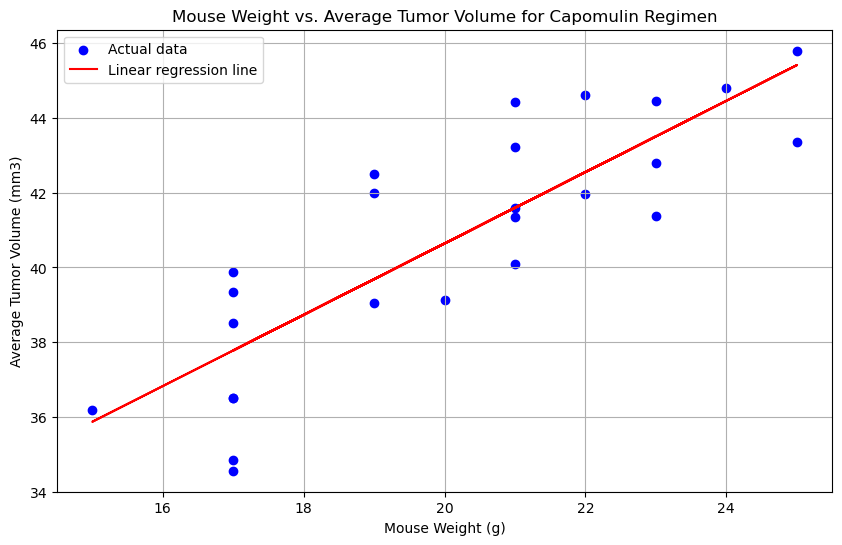

In [25]:
# Drop NaN values from both Series
avg_tumor_cap = avg_tumor_cap.dropna()
mouse_weight = mouse_weight.dropna()

# Convert Series to numpy arrays
mouse_weight_array = np.array([weight[0] for weight in mouse_weight.values])
avg_tumor_cap_array = avg_tumor_cap.values

# Calculate the correlation coefficient
correlation_coefficient, _ = pearsonr(mouse_weight_array, avg_tumor_cap_array)
print("Correlation coefficient:", correlation_coefficient)

# Fit a linear regression model
slope, intercept, r_value, p_value, std_err = linregress(mouse_weight_array, avg_tumor_cap_array)

# Predicted values using the linear regression model
predicted_tumor_volume = slope * mouse_weight_array + intercept

# Plot the scatter plot and regression line
plt.figure(figsize=(10, 6))
plt.scatter(mouse_weight_array, avg_tumor_cap_array, color='blue', label='Actual data')
plt.plot(mouse_weight_array, predicted_tumor_volume, color='red', label='Linear regression line')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.legend()
plt.grid(True)
plt.show()